# HomeWork 7

**DeadLine : 12:00 PM 19 Aban 1399**

**Total points : 165 pts**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 5A

Here is for your helper functions(optional)

Implement these functions for converting color spaces.

In [13]:
def convert_to_hsv(image):
    '''
    Converts the color space of the input image to the HSV color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    out_img = image.copy()
    
    #Write your code here
    out_img = cv2.cvtColor(out_img,cv2.COLOR_BGR2HSV)
    
    return out_img

def convert_to_ycbcr(image):
    '''
    Converts the color space of the input image to the YCbCr color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    out_img = image.copy()
    
    #Write your code here
    out_img = cv2.cvtColor(out_img,cv2.COLOR_BGR2YCR_CB)
    
    return out_img

Test your implementation (dont change this cell)

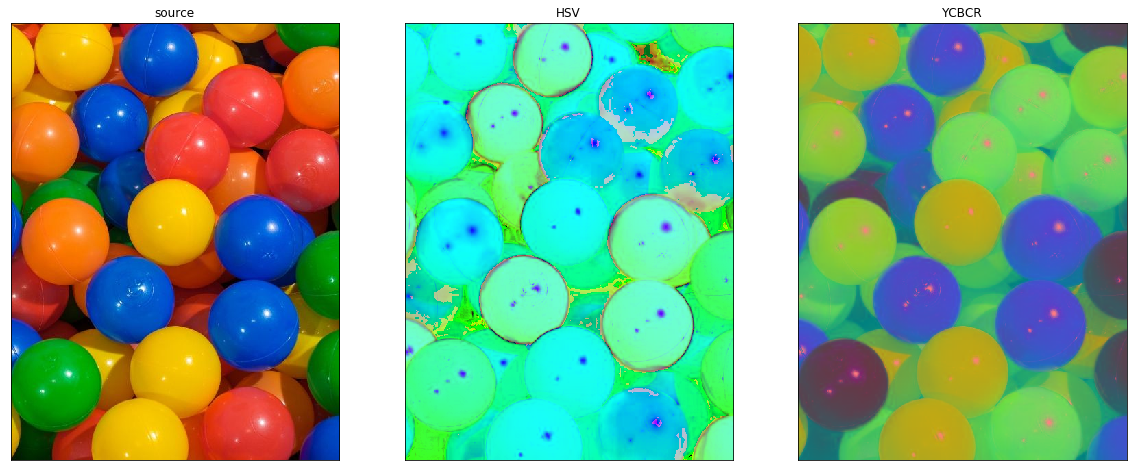

In [14]:
image_list = []

image = cv2.imread(os.path.join('images', '5.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

image_list.append([convert_to_hsv(image), 'HSV', 'img'])
image_list.append([convert_to_ycbcr(image), 'YCBCR', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2A')

# PART 5B

Here is for your helper functions(optional)

Implement this function to get differences between two images.

In [179]:
def get_dif(image1, image2):
    '''
    Creates a new image that differences between two input images are shown.
    
    Parameters:
        image1 (numpy.ndarray): The first input image.
        image2 (numpy.ndarray): The second input image.
    
    Returns:
        numpy.ndarray: The result difference image.
    '''
    
    out_img1 = image1.copy()
    out_img2 = image2.copy()
    img_rgb = cv2.merge((out_img1,out_img2,out_img2))
    return img_rgb

Test your implementation (dont change this cell)

(586, 805, 3)


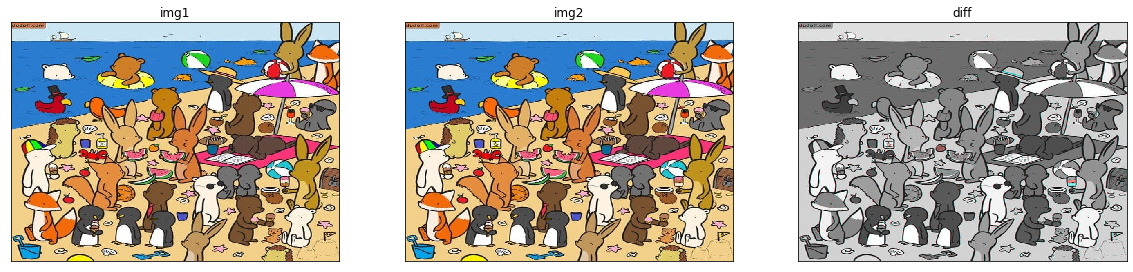

In [180]:
image_list = []

image1 = cv2.imread(os.path.join('images', '5b1.jpg'))
print(image1.shape)
image_list.append([cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), 'img1', 'img'])
image2 = cv2.imread(os.path.join('images', '5b2.jpg'))
image_list.append([cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), 'img2', 'img'])

image1 = cv2.imread(os.path.join('images', '5b1.jpg'), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(os.path.join('images', '5b2.jpg'), cv2.IMREAD_GRAYSCALE)
image_list.append([get_dif(image1, image2), 'diff', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2B')

# PART 6

Here is for your helper functions(optional)

Implement this function to process the input frame.

In [162]:
def process_frame(frame):
    '''
    Converts red circles in the input image to white circles.
    
    Parameters:
        frame (numpy.ndarray): The input frame.
    
    Returns:
        numpy.ndarray: The result output frame.
    '''
    
    result = frame.copy()

    #Write your code here
    low_bound = np.array([0,0,100],dtype=np.uint8)
    high_bound = np.array([30,30,255], dtype=np.uint8)
    result = cv2.inRange(result, low_bound, high_bound)
    mask = np.where(result != 0)
    frame[mask] = [255,255,255]
    
    result = cv2.cvtColor(result, cv2.COLOR_GRAY2BGR)

    return frame

Test your implementation (dont change this cell)

In [163]:
cap = cv2.VideoCapture('balls.mp4')

frame_width = int(cap.get(3)) 
frame_height = int(cap.get(4)) 
   
size = (frame_width, frame_height) 
fps = cap.get(cv2.CAP_PROP_FPS)
out = cv2.VideoWriter('balls_processed.mp4',  
                         cv2.VideoWriter_fourcc(*'DIVX'), 
                         fps, size) 

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        out.write(process_frame(frame))
    else:
        break
out.release()
cap.release()

In [165]:
from IPython.display import HTML

text =  """
<table>
<tr>
    <td>
        <h3>Input</h3>
        <video alt="input" width="400" height="240" autoplay>
            <source src="balls.mp4" type="video/mp4">
        </video>
    </td>
    <td>
      <h3>Processed</h3>
      <video alt="output" width="400" height="240" autoplay>
            <source src="balls_processed.mp4" type="video/mp4">
      </video>
    </td>
</tr>
</table>

"""
HTML(text)

Input,Processed


# PART 7

Here is for your helper functions(optional)

In [380]:
m1 = np.array([[84.33,-16.97],[-16.97,59.48]])
print("M1: ",np.round(np.linalg.eig(m1)[0],3))

m2 = np.array([[163.54,-0.217],[-0.217,0.1053]])
print("M2: ",np.round(np.linalg.eig(m2)[0],3))

m3 = np.array([[0.1714,-0.496],[-0.496,164.4]])
print("M3: ",np.round(np.linalg.eig(m3)[0],3))

m4 = np.array([[0.1439,-0.009],[-0.009,0.323]])
print("M4: ",np.round(np.linalg.eig(m4)[0],3))

M1:  [92.937 50.873]
M2:  [1.6354e+02 1.0500e-01]
M3:  [  0.17  164.401]
M4:  [0.143 0.323]


Implement this function for Harris detection.

In [362]:
def harris_points(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    out_img = image.copy()
    window_size = 3
    k = 0.04
    #Write your code here
    out_img = np.float32(cv2.cvtColor(out_img, cv2.COLOR_RGB2GRAY))
    Ix, Iy = np.array(np.gradient(out_img))
    threshold = 0.9

    Ixy = Ix*Iy
    Ix2 = np.square(Ix)
    Iy2 = np.square(Iy)
    
    Ixy = cv2.GaussianBlur(Ixy,(5,5),0)
    Ix2 = cv2.GaussianBlur(Ix2,(5,5),0)
    Iy2 = cv2.GaussianBlur(Iy2,(5,5),0)
    
    harris = Ix2*Iy2 - np.square(Ixy) - k * np.square(Ix2 + Iy2)
    
    cv2.normalize(harris, harris, 0, 1, cv2.NORM_MINMAX)

    loc = np.transpose(np.where(harris >= threshold))
    
    for i in range(loc.shape[0]):
        x,y = loc[i]
        cv2.circle(image, (x,y), 10, (255,0,0), -1)
    
    return image

dont change this cell!!

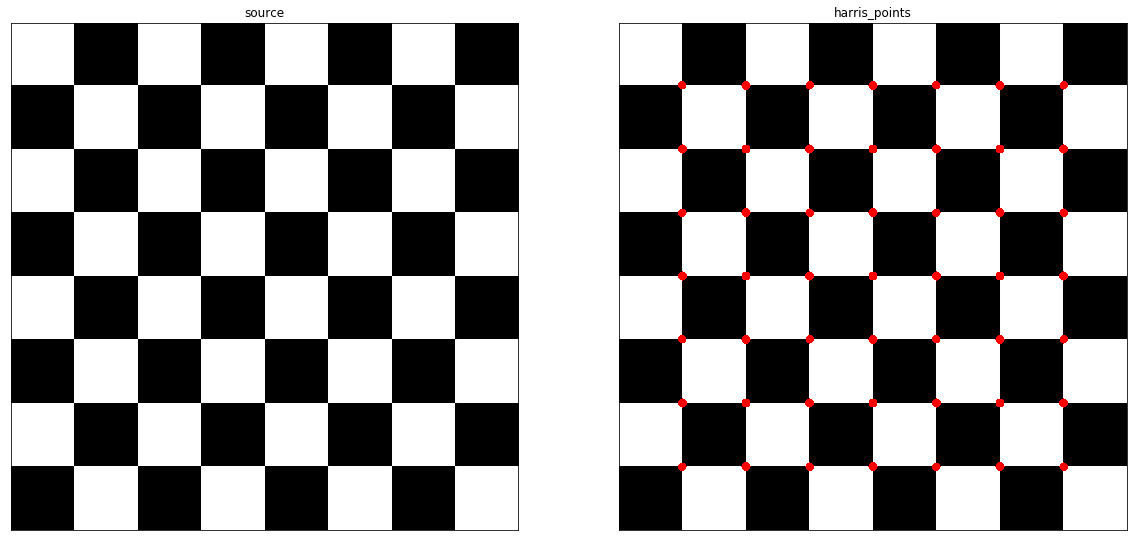

In [363]:
image_list = []

image = cv2.imread(os.path.join('images', '7.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

image_list.append([harris_points(image), 'harris_points', 'img'])

plotter(image_list,1 , 2, True, 20, 10, '7')

for create proper files for sending in quera run this cell.

In [364]:
!python notebook_converter.py

End!!!